# Project SVM

In [23]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv('cardiotrain.csv', index_col=None, delimiter=';')
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'cardiotrain': {'class_column': 'cardio', 'index_col': None}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

In [24]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'cardiotrain.csv', index_col=None, delimiter=';')
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

In [25]:
card, card_classes = load_dataset('cardiotrain', 'cardio')
print(card_classes)

y = card.pop('class')
X = card

[0 1]


In [26]:
X, y, classes = prepare_dataset('cardiotrain')

In [27]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [28]:
X.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000


In [29]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: class, Length: 70000, dtype: int8

In [30]:
classes

array([0, 1], dtype=int64)

In [31]:
from sklearn.preprocessing import Normalizer, StandardScaler
normalizer = Normalizer()
standarizer = StandardScaler()
preprocessor = standarizer


In [32]:

def preprocess_data(X, preprocessor=None):
    if preprocessor is not None:
        preprocessor.fit(X)
        X_preprocessed = X.copy()
        X_preprocessed[:] = preprocessor.transform(X.values)
        X = X_preprocessed
    return X

In [33]:
X = preprocess_data(X, standarizer)
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.436062,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
1,0.307686,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.39572,-0.310879,-0.238384,0.494167
2,-0.247997,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.39572,-0.310879,-0.238384,-2.023607
3,-0.748152,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
4,-0.808543,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.39572,-0.310879,-0.238384,-2.023607


In [34]:
y.value_counts()

0    35021
1    34979
Name: class, dtype: int64

In [35]:
X.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04
mean,5.202481e-16,7.061177e-16,1.768550e-15,-3.450534e-16,-1.518658e-15,-7.473280e-16,-7.881616e-16,1.843571e-15,1.804363e-15,-1.047438e-15,4.778670e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.514407e+00,-7.331083e-01,-1.332014e+01,-4.460075e+00,-1.810381e+00,-8.841161e-01,-5.393221e-01,-3.957199e-01,-3.108791e-01,-2.383844e-01,-2.023607e+00
25%,-7.315341e-01,-7.331083e-01,-6.527630e-01,-6.394770e-01,-5.725127e-02,-8.823850e-02,-5.393221e-01,-3.957199e-01,-3.108791e-01,-2.383844e-01,4.941671e-01
50%,9.489744e-02,-7.331083e-01,7.804703e-02,-1.532192e-01,-5.725127e-02,-8.823850e-02,-5.393221e-01,-3.957199e-01,-3.108791e-01,-2.383844e-01,4.941671e-01
75%,7.531244e-01,1.364055e+00,6.870554e-01,5.414349e-01,7.261016e-02,-3.517999e-02,9.307354e-01,-3.957199e-01,-3.108791e-01,-2.383844e-01,4.941671e-01
max,1.720199e+00,1.364055e+00,1.043119e+01,8.738353e+00,1.031826e+02,5.785165e+01,2.400793e+00,3.099157e+00,3.216684e+00,4.194906e+00,4.941671e-01


In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify=y)
# Train a linear SVM
svm1 = SVC(kernel = 'linear')
svm1.fit(X_train, y_train)
pred = svm1.predict(X_test)
pred_train = svm1.predict(X_train)

In [37]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred))

0.7233392857142857
0.7191428571428572


In [38]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # tytuł wykresu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    
    fig, ax = plt.subplots(figsize=(10,5))
    # rysuje CM
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # dodaje pasek z boku
    ax.figure.colorbar(img, ax=ax)
    # dodatki do wykresu
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    
    # etykiety
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    
    return ax

In [40]:
def normalize_confusion_matrix(confusion_matrix):
    return confusion_matrix.astype(
        'float') / confusion_matrix.sum(
        axis=1)[np.newaxis].T

0.7229857142857142 SVM + CV


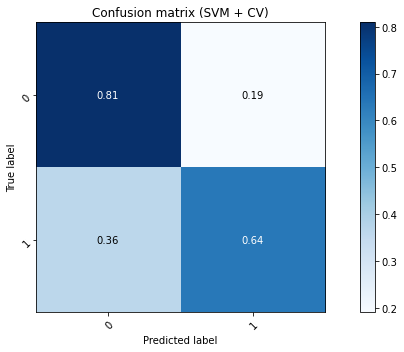

In [41]:
cross_val = KFold(n_splits=9)#, shuffle=True)

predicted = []
target = []

for train_index, test_index in cross_val.split(X, y):
    svm = SVC( kernel="linear")
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    svm.fit(X_train_cv, y_train_cv)
    predicted = np.concatenate((predicted, svm.predict(X_test_cv)))
    target = np.concatenate((target, y_test_cv))

print(accuracy_score(target, predicted), 'SVM + CV')
cm_svm = confusion_matrix(target, predicted)

plot_confusion_matrix(normalize_confusion_matrix(cm_svm),
                      card_classes, title_appendix='SVM + CV')
plt.show()

In [42]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(svm1, X, y, cv=9)
cv_results['test_score']

array([0.720108  , 0.71393674, 0.73360761, 0.72756493, 0.72255078,
       0.72255078, 0.73090769, 0.7144143 , 0.72238652])

In [43]:
y.value_counts()

0    35021
1    34979
Name: class, dtype: int64

In [44]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[ 0.01, 1.0, 10]}
searcher = GridSearchCV(svm1, parameters)
searcher.fit(X_train, y_train)
pred = searcher.predict(X_test)
pred_train = searcher.predict(X_train)
print(accuracy_score(y_test, pred))
print(accuracy_score(y_train, pred_train))

0.7191428571428572
0.7235


In [45]:
print("Best CV params", searcher.best_params_)

Best CV params {'C': 10}


In [47]:
# Instantiate an RBF SVM
svm = SVC(kernel='rbf')

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[ 0.0001, 0.001, 0.01, 0.1],
              'C' : [ 0.1, 1, 10, 100, 200],
              'kernel': ['linear', 'poly', 'sigmoid', 
                         'rbf']}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)
pred = searcher.predict(X_test)
pred_train = searcher.predict(X_train)
print(accuracy_score(y_test, pred))
print(accuracy_score(y_train, pred_train))
# Report the best parameters
print("Best CV params", searcher.best_params_)

0.7296428571428571
0.7367678571428572
Best CV params {'C': 200, 'gamma': 0.01, 'kernel': 'rbf'}


In [49]:
print("Best CV accuracy", searcher.best_score_)

Best CV accuracy 0.7333571428571429


In [50]:
print("Best CV params", searcher.best_params_)

Best CV params {'C': 200, 'gamma': 0.01, 'kernel': 'rbf'}


In [51]:
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Test accuracy of best grid search hypers: 0.7296428571428571


In [52]:
svm2 = SVC(C=200, gamma=0.01, kernel='rbf')
svm2.fit(X_train, y_train)

SVC(C=200, gamma=0.01)

In [53]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(svm2, X, y, cv=9)
cv_results['test_score']

array([0.72975058, 0.72627925, 0.74299306, 0.73592183, 0.73232193,
       0.73116482, 0.74106454, 0.72637264, 0.73138742])

In [54]:
y.value_counts()

0    35021
1    34979
Name: class, dtype: int64

In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')
    
def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # tytuł wykresu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    
    fig, ax = plt.subplots()
    # rysuje CM
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # dodaje pasek z boku
    ax.figure.colorbar(img, ax=ax)
    # dodatki do wykresu
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    
    # etykiety
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    
    return ax

def normalize_confusion_matrix(confusion_matrix):
    return confusion_matrix.astype(
        'float') / confusion_matrix.sum(
        axis=1)[np.newaxis].T

In [57]:
svm = SVC(C=200, gamma = 0.01)
svm.fit(X_train, y_train)
y_tree = svm.predict(X_test)

Results for SVM
----
  Accuracy:  0.7296428571428571
  Precision: 0.7310312783215369
  Recall:    0.7296206055904019
  F1 score:  0.7292234283779541
  Mislabeled 3785 out of 14000




<AxesSubplot:title={'center':'Confusion matrix '}, xlabel='Predicted label', ylabel='True label'>

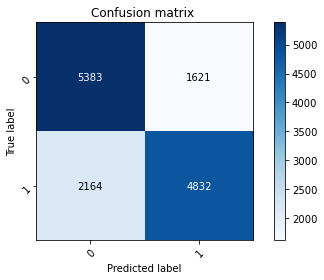

In [58]:
print_results(calculate_metrics(y_test.values, y_tree), 'SVM')
cm = confusion_matrix(y_test, y_tree)
plot_confusion_matrix(cm, classes)

In [59]:
bclf = BaggingClassifier(base_estimator = SVC(C=200, gamma = 0.01 ), n_estimators = 250)
bclf.fit(X_train, y_train)
y_b = bclf.predict(X_test)

Results for Bagging Ensemble
----
  Accuracy:  0.7301428571428571
  Precision: 0.7315498742235227
  Recall:    0.7301204833046476
  F1 score:  0.7297196256562649
  Mislabeled 3778 out of 14000




<AxesSubplot:title={'center':'Confusion matrix '}, xlabel='Predicted label', ylabel='True label'>

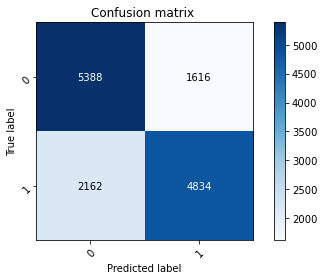

In [60]:
print_results(calculate_metrics(y_test.values, y_b), 'Bagging Ensemble')
cm = confusion_matrix(y_test, y_b)
plot_confusion_matrix(cm, classes)

In [61]:
print(bclf.estimators_)

[SVC(C=200, gamma=0.01, random_state=1387022508), SVC(C=200, gamma=0.01, random_state=1677845494), SVC(C=200, gamma=0.01, random_state=1328516451), SVC(C=200, gamma=0.01, random_state=1062726317), SVC(C=200, gamma=0.01, random_state=1382283917), SVC(C=200, gamma=0.01, random_state=1857844825), SVC(C=200, gamma=0.01, random_state=1712913962), SVC(C=200, gamma=0.01, random_state=285613109), SVC(C=200, gamma=0.01, random_state=688238079), SVC(C=200, gamma=0.01, random_state=669830317), SVC(C=200, gamma=0.01, random_state=1380143556), SVC(C=200, gamma=0.01, random_state=210977207), SVC(C=200, gamma=0.01, random_state=471632626), SVC(C=200, gamma=0.01, random_state=207313107), SVC(C=200, gamma=0.01, random_state=1689464036), SVC(C=200, gamma=0.01, random_state=492947506), SVC(C=200, gamma=0.01, random_state=881555368), SVC(C=200, gamma=0.01, random_state=1051146866), SVC(C=200, gamma=0.01, random_state=1277104490), SVC(C=200, gamma=0.01, random_state=1730646390), SVC(C=200, gamma=0.01, rand

In [62]:
from sklearn.model_selection import KFold, StratifiedKFold

def cross_validate(classifier, kfold, X, y, classes, params=None, talk=True):
    if params is None:
        params = {}
    if classifier.__class__.__name__ == 'ABCMeta':
        clf = classifier(**params)
    else:
        clf = classifier
    predicted = []
    target = []

    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf.fit(X=X_train, y=y_train)
        predicted = np.concatenate((predicted, clf.predict(X_test)))
        target = np.concatenate((target, y_test))
    
    metrics = calculate_metrics(target, predicted)
    cm = confusion_matrix(target, predicted)
    if talk:
        print_results(metrics, clf.__class__.__name__)
        plot_confusion_matrix(normalize_confusion_matrix(cm),
                              classes,
                              title_appendix=clf.__class__.__name__)
        plt.show()
    else:
        return metrics, cm

In [63]:
y.value_counts()

0    35021
1    34979
Name: class, dtype: int64

Results for BaggingClassifier
----
  Accuracy:  0.7331285714285715
  Precision: 0.734746350741416
  Recall:    0.7331035582029952
  F1 score:  0.7326540814729778
  Mislabeled 18681 out of 70000




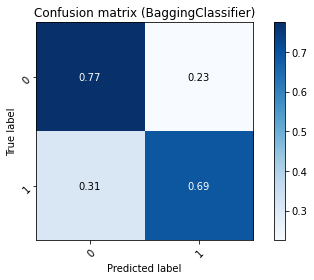

In [64]:
cross_validate(bclf, StratifiedKFold(9), X, y, classes)

Results for BaggingClassifier
----
  Accuracy:  0.6941857142857143
  Precision: 0.6960018739163532
  Recall:    0.694156675610689
  F1 score:  0.6934552689278504
  Mislabeled 21407 out of 70000




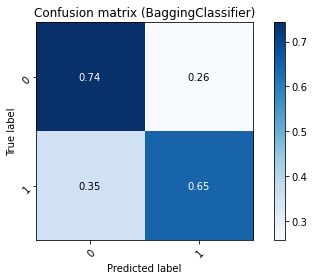

In [65]:
cross_validate(BaggingClassifier, StratifiedKFold(9), X, y, classes)

In [66]:
from sklearn.model_selection import cross_validate

In [67]:
#SVM
cv_results = cross_validate(svm, X, y, cv=9)
print(cv_results['test_score'])
np.average(cv_results['test_score'])

[0.72975058 0.72627925 0.74299306 0.73592183 0.73232193 0.73116482
 0.74106454 0.72637264 0.73138742]


0.7330284529022274

In [68]:
#bagging svm
cv_results = cross_validate(bclf, X, y, cv=9)
print(cv_results['test_score'])
np.average(cv_results['test_score'])

[0.72923631 0.72615068 0.74247879 0.73630753 0.7328362  0.73039342
 0.74132168 0.72688697 0.73100167]


0.7329570282084228

Powyżej zaprezentowano modele uzyskane za pomocą metod klasyfikacji: SVM oraz Bagging.
Modele zostały wytrenowane na zbiorze cardiotrain. Zbiór ten zawiera informacje na temat czynników, które mogą wpływać
na obecność choroby sercowo-naczyniowej. Poniżej opis zbioru.

Cechy:

Age - wiek (dni) 
Height - wysokość (cm)
Weight - waga (kg)
Gender - płeć (kod kategorii: 1,2)
Ap_hi - Systolic blood pressure - skurczowe ciśnienie krwi
Ap_lo - Diastolic blood pressure - rozkurczowe ciśnienie krwi
Cholesterol - cholesterol - poziom 1: normalny, 2: powyżej normy, 3: znacznie powyżej normy
Glucose - glukoza - poziom 1: normalny, 2: powyżej normy, 3: znacznie powyżej normy
Smoking - palenie - zmienna binarna
Alcohol intake - spożycie alkoholu - zmienna binarna
Physical activity - aktywność fizyczna - zmienna binarna
Presence or absence of cardiovascular disease - obecność lub brak choroby sercowo-naczyniowej - Zmienna docelowa - zmienna binarna

Z dwóch wybranych metod klasyfikacji lepsze wyniki dała metoda SVM.
Widzimy, że accuracy, precision i recall osiągają wyniki nieco lepsze od wyników dla dokładności, precyzji i czyłości dla metody Bagging.
Standaryzacja okazała się być dużo lepsza od normalizacji, dla której wyniki nie były obecujące.
Wyniki można poprawić regulując między innymi wartością parametru C, ale ze zwględu na dużą wielkość zbioru - liczy on 70 000 wierszy i 12 kolumn - jest to bardzo czasochłonne. Próba zmiany i zwiększenia ilości parametrów w GridSearch, przy takich danych powoduje, że często wywołanie jednej komórki kodu przelicza się powyżej 48 godzin.

